# Modelo para Sure Tomorrow

## Índice <a id='back'></a>
* [Introducción](#intro)
* [Etapa 1. Descripción y preprocesamiento de los datos](#data_review)
    * [1. 1. Información general de los datos](#data_review_data)
    * [1. 2. Conclusiones](#data_review_conclusions)
* [Etapa 2. Análisis de datos](#data_analysis)
    * [2. 1. Tarea 1: vecinos similares](#data_analysis_neighbors)
    * [2. 2. Conclusiones](#data_analysis_conclusions)
* [Etapa 3. Construcción del modelo](#data_model)
    * [3. 1. Tarea 2: Predicción de prestación de seguro](#data_model_task2)
    * [3. 2. Tarea 3: Predicción de cantidad de prestación de seguro](#data_model_task3)
    * [3. 3. Tarea 4: Ofuscación de datos](#data_model_task4)
        * [3. 3. 1. Ofuscación no afecta regresión lineal](#data_model_task4_lineal)
        * [3. 3. 2. Prueba de regresión lineal](#data_model_task4_linealTest)
    * [3. 4. Conclusiones](#data_model_conclusions)
* [Etapa 4. Conclusión general](#data_conclusion)

## Introducción <a id='intro'></a>

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning, por lo que este proyecto tiene 4 tareas (objetivos):

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.

Los datos se almacenan en el archivo `/datasets/insurance_us.csv`. Como se desconoce la calidad de los datos, el proyecto consistirá en cuatro etapas:

1. Descripción y preprocesamiento de los datos.
2. Análisis de datos.
3. Construcción del modelo.
4. Conclusión general.

[Volver a Contenidos](#back)

## Etapa 1. Descripción y preprocesamiento de los datos <a id='data_review'></a>

Se importan las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from IPython.display import display

Se leerá el archivo y se guardará en la variable `data`. 

In [2]:
try:
    data = pd.read_csv('insurance_us.csv')
except:
    data = pd.read_csv('/datasets/insurance_us.csv')

### 1. 1. Información general de los datos <a id='data_review_data'></a>

Se imprimirá la información general de `data` y las primeras 10 filas de éste.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head(10)

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


El dataframe contiene 5,000 filas y 5 columnas, las cuales son:

1. `Gender` - sexo del asegurado.
2. `Age` - edad del asegurado.
3. `Salary` - salario del asegurado.
4. `Family members` - cantidad de familiares del asegurado.
5. `Insurance benefits` - número de beneficios de seguro recibidos por la persona asegurada en los últimos cinco años.

Se observa que los nombres de las columnas no están nombradas en la convención estándar y los datos de la columna `Age` pueden ser cambiados de tipo float a tipo int. Ninguna de las columnas contiene valores ausentes.

Se estandarizarás los nombre de las columnas.

In [5]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Family members', 'Insurance benefits'], dtype='object')

In [6]:
data.columns = ['gender', 'age', 'income', 'family_members', 'insurance_benefits']
data.columns

Index(['gender', 'age', 'income', 'family_members', 'insurance_benefits'], dtype='object')

Se cambiará el tipo de datos de la columna `Age`.

In [7]:
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Existe la posibilidad que el dataframe contenga filas duplicadas, sin embargo, no se cuenta con identificadores únicos. Por esta razón, se conservarán todas las filas del dataframe.

[Volver a Contenidos](#back)

### 1. 2. Conclusiones <a id='data_review_conclusions'></a>

Se abrió el archivo y se guardó en un dataset, el cual contiene información del asegurado como sexo, edad, salario, número de familiares y cantidad de beneficios recibidos en los últimos cinco años.

Ninguna columna contiene valores ausentes y se cambió el formato de los nombres de las columnas a la manera convencional (minúsculas y con space case). También se cambió el tipo de datos de la columna `age` (de tipo float a int).

En la siguiente etapa se analizarán los datos.

[Volver a Contenidos](#back)

## Etapa 2. Análisis de datos <a id='data_analysis'></a>

Todas las columnas son de tipo numérico, sin embargo, la columna `gender` describe una variable de tipo catégorico. Se mostrarán todos sus valores.

In [8]:
print(data['gender'].value_counts())

gender
0    2505
1    2495
Name: count, dtype: int64


Únicamente se tienen dos categorías para el sexo del asegurado. Se mostrarán gráficas de caja para las columnas restantes para investigar la existencia de valores atípicos. No se analizará la columna `insurance_benefits` pues es la columna que será el objetivo del modelo.

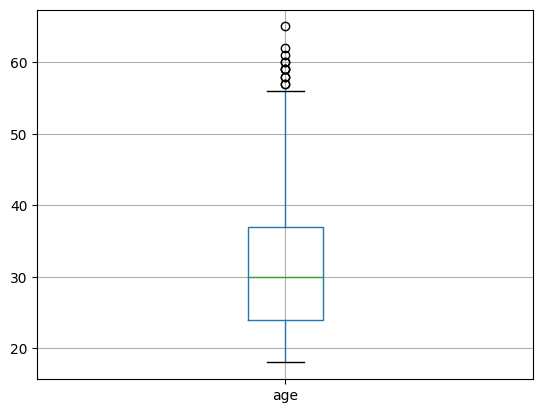

count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: age, dtype: float64


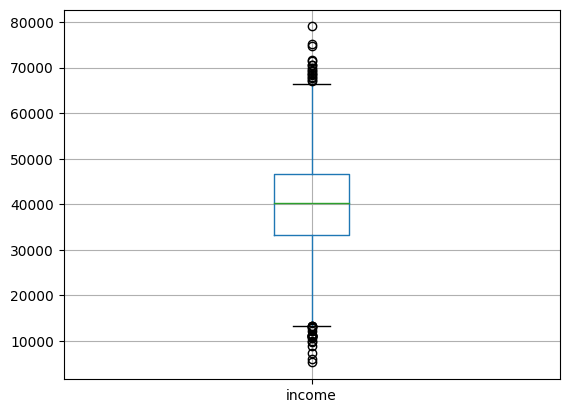

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: income, dtype: float64


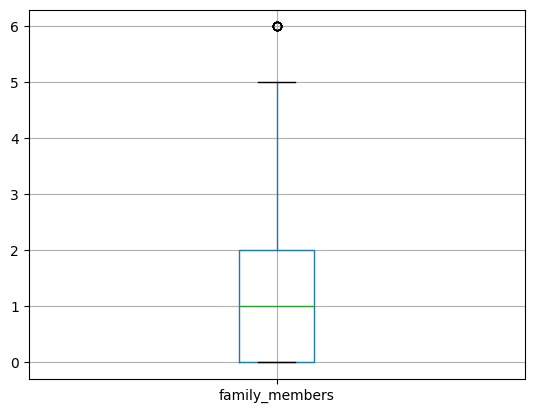

count    5000.000000
mean        1.194200
std         1.091387
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: family_members, dtype: float64


In [9]:
for item in ['age', 'income', 'family_members']:
    data.boxplot(column=item)
    plt.show()
    print(data[item].describe())

Las tres columnas tienen valores atípicos por lo que se crearán dos funciones para determinar los límites superior e inferior correspondientes.

In [10]:
def lim_sup(string):
    Q1 = data[string].quantile(0.25)
    Q3 = data[string].quantile(0.75)
    IQR = Q3 - Q1
    lim_superior = Q3 + (1.5 * IQR)
    return lim_superior

In [11]:
def lim_inf(string):
    Q1 = data[string].quantile(0.25)
    Q3 = data[string].quantile(0.75)
    IQR = Q3 - Q1
    lim_infe = Q1 - (1.5 * IQR)
    return lim_infe

In [12]:
# limite superior de age (no hay atipicos inferiores)
ls_age = lim_sup('age')
# límites inferior y superior de income
li_income = lim_inf('income')
ls_income = lim_sup('income')
# límite superior de family members (no hay atípicos inferiores)
ls_members = lim_sup('family_members')

In [13]:
data_no_outliers = data.query(
    '(age < @ls_age) & (@li_income < income < @ls_income) & (family_members < @ls_members)'
    ).reset_index(drop=True)
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4912 non-null   int64  
 1   age                 4912 non-null   int64  
 2   income              4912 non-null   float64
 3   family_members      4912 non-null   int64  
 4   insurance_benefits  4912 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 192.0 KB


Se imprimirán los histogramas de estas columnas para comprobar que sus distribuciones ya no tienen valores atípicos.

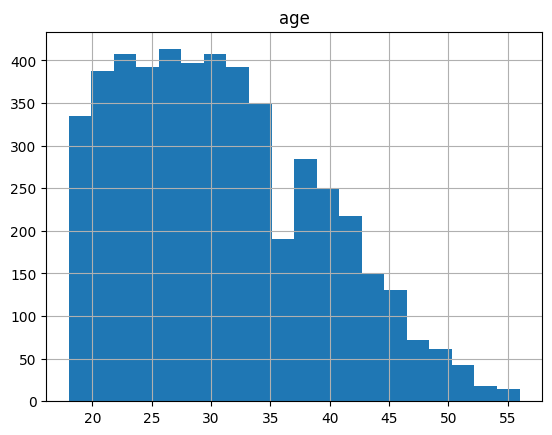

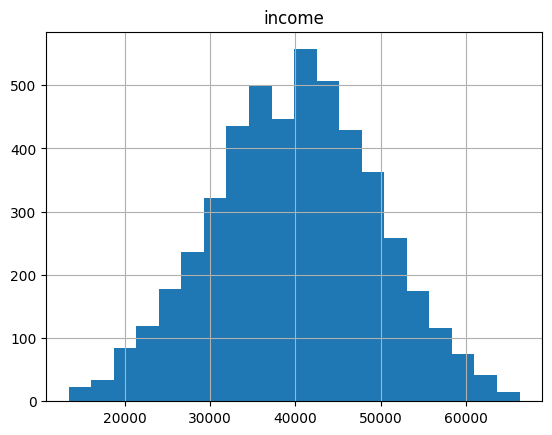

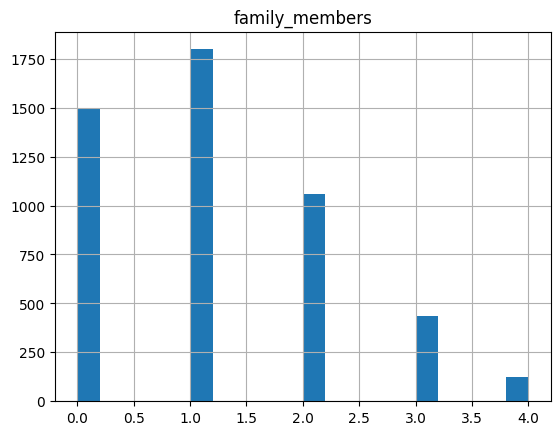

In [14]:
for item in ['age', 'income', 'family_members']:
    data_no_outliers.hist(item, bins=20, grid=True)
    plt.show()

El dataset ya no cuenta con valores atípicos que podrían interferir con la calidad del modelo.

[Volver a Contenidos](#back)

### 2. 1. Tarea 1: vecinos similares <a id='data_analysis_neighbors'></a>

Se comprobará si existen determinados grupos de clientes observando el gráfico de pares.

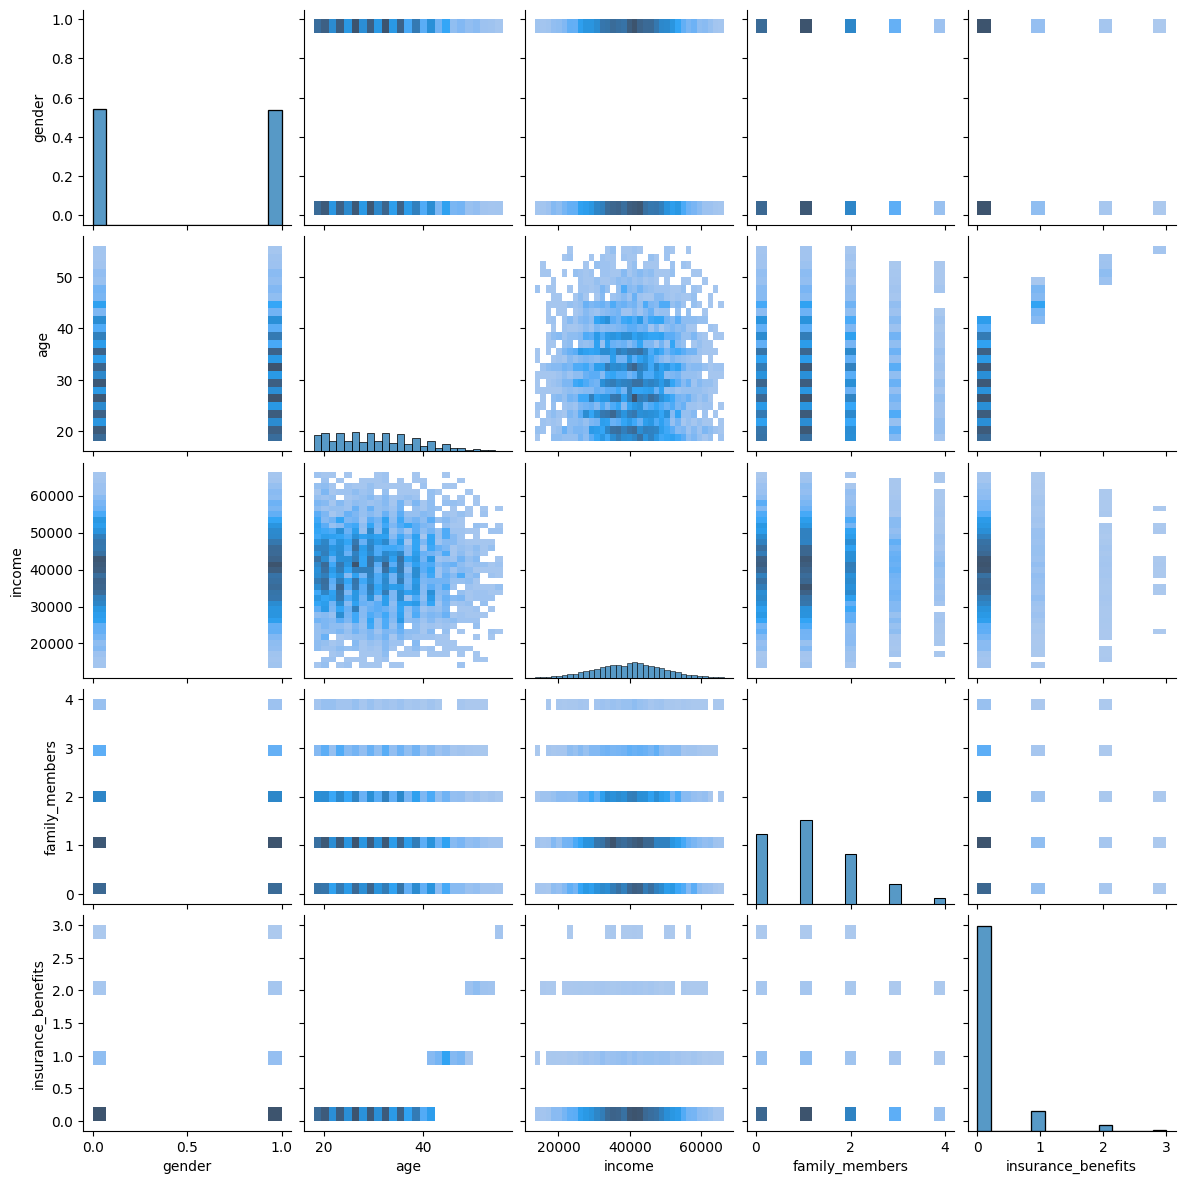

In [15]:
g = sns.pairplot(data_no_outliers, kind='hist')
g.fig.set_size_inches(12, 12)
plt.show()

Es complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Por esta razón, se utilizarán técnicas de LA y ML.

Se desarrollará un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos. Se utilizarán dos distancias entre vectores: distancia euclidiana y distancia Manhattan.

A continuación, se creará una función cuyo resultado sean los k vecinos más cercanos para el $n^{th}$ objeto basándose en una métrica de distancia. Además por el momento no se utilizará la columna `insurance_benefits`.

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [17]:
def get_knn(df, n, k, metric):
    """_summary_

    Args:
        df (DataFrame): DataFrame de pandas
        n (int): número de objetos para los que se buscan los vecinos más cercanos
        k (int): número de vecinos más cercanos a devolver
        metric (funcion): nombre de la métrica de distancia
    """
    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    return df_res

Se escalaran los datos.

In [18]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(data_no_outliers[feature_names].to_numpy())

df_scaled = data_no_outliers.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(data_no_outliers[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
428,0,0.642857,0.547511,0.25,0
3856,1,0.535714,0.606335,0.25,0
3048,1,0.607143,0.800905,0.00,0
509,0,0.464286,0.580694,0.50,0
3519,1,0.571429,0.420814,0.25,0


A continuación, se obtendrán registros similares para un objeto dado con la distancia Euclidiana, o bien, con la distancia Manhattan, así como, con los datos sin escalar y escalados.

Se elige el objeto con el índice 143 y se considerarán los 15 vecinos más cercanos.

In [20]:
not_scaled_euclidean = get_knn(data_no_outliers[feature_names], 143, 15, 'euclidean')
not_scaled_euclidean

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,distance
143,1,41,33200.0,3,0.000000
17,1,41,33200.0,2,1.000000
4821,1,40,33200.0,1,2.236068
3691,0,39,33200.0,2,2.449490
1867,1,38,33200.0,2,3.162278
4476,0,37,33200.0,1,4.582576
1902,1,33,33200.0,1,8.246211
1389,0,50,33200.0,1,9.273618
4698,0,31,33200.0,3,10.049876
3294,1,30,33200.0,3,11.000000


In [21]:
not_scaled_manhattan = get_knn(data_no_outliers[feature_names], 143, 15, 'cityblock')
not_scaled_manhattan

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,distance
143,1,41,33200.0,3,0.0
17,1,41,33200.0,2,1.0
4821,1,40,33200.0,1,3.0
3691,0,39,33200.0,2,4.0
1867,1,38,33200.0,2,4.0
4476,0,37,33200.0,1,7.0
1902,1,33,33200.0,1,10.0
3294,1,30,33200.0,3,11.0
4698,0,31,33200.0,3,11.0
1389,0,50,33200.0,1,12.0


In [22]:
scaled_euclidean = get_knn(df_scaled[feature_names], 143, 15, 'euclidean')
scaled_euclidean

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,distance
143,1,0.732143,0.500754,0.75,0.000000
2248,1,0.714286,0.485671,0.75,0.023375
3743,1,0.750000,0.518854,0.75,0.025426
624,1,0.732143,0.466063,0.75,0.034691
1340,1,0.696429,0.499246,0.75,0.035746
3887,1,0.767857,0.511312,0.75,0.037242
4058,1,0.767857,0.515837,0.75,0.038769
563,1,0.714286,0.463047,0.75,0.041722
1226,1,0.732143,0.542986,0.75,0.042232
267,1,0.696429,0.437406,0.75,0.072722


In [23]:
scaled_manhattan = get_knn(df_scaled[feature_names], 143, 15, 'cityblock')
scaled_manhattan

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,distance
143,1,0.732143,0.500754,0.75,0.000000
2248,1,0.714286,0.485671,0.75,0.032940
624,1,0.732143,0.466063,0.75,0.034691
3743,1,0.750000,0.518854,0.75,0.035957
1340,1,0.696429,0.499246,0.75,0.037223
1226,1,0.732143,0.542986,0.75,0.042232
3887,1,0.767857,0.511312,0.75,0.046272
4058,1,0.767857,0.515837,0.75,0.050797
563,1,0.714286,0.463047,0.75,0.055565
2420,1,0.660714,0.517345,0.75,0.088020


La primera observación es que cuando los datos están escalados las distancias (con cualquiera de las dos) son mucho menores. Esto quiere decir que con los datos escalados, el algoritmo encuentra vecinos que son muy similares al elegido. Por lo tanto, con los datos escalados, el algoritmo tiene mayor calidad.

Por otro lado, si los datos no están escalados no existe una diferencia significativa al utilizar la distancia euclidiana o Manhattan. No obstante, con los datos escalados, la distancia euclidiana es menor que la distancia Manhattan.

Otra observación importante es que como el modelo está basado en una distancia, entonces es muy sensible a datos que son muy grandes. En este caso, la variable correspondiente al ingreso tiene mayor peso que cualquier otra.

El algoritmo con mayor calidad es con los datos escalados y basado en la distancia euclideana.

[Volver a Contenidos](#back)

### 2. 2. Conclusiones <a id='data_analysis_conclusions'></a>

Se analizaron los valores atípicos para las columnas `age`, `income` y `family_members` utilizando diagramas de caja. Con esto se determinaron los límites superior e inferior para cada una de estas columnas y se filtró el dataset para eliminar los valores atípicos.

Se creó un algoritmo para determinar los vecinos similares más cercanos a uno dado. Se examinó este algoritmo con los datos escalados y sin escalar y basándose en dos distancias distintas: la ecuclidiana y Manhattan.

El algoritmo con mejor calidad es con los datos escalados y la distancia euclidiana. Esto es, mediante este algoritmo se encontraron los vecinos similares más cercanos a uno dado.

[Volver a Contenidos](#back)

## Etapa 3. Construcción del modelo <a id='data_model'></a>

En esta estapa se construirán dos modelos, el objetivo del primer modelo es predecir si un cliente recibirá una prestación del seguro o no, mientras que el objetivo del segundo es predecir la cantidad de beneficios de seguro que recibirá un cliente.

### 3. 1. Tarea 2: Predicción de prestación de seguro <a id='data_model_task2'></a>

En la columna `insurance_benefits` se encuentra la información sobre la cantidad de veces que un cliente ha recibido la prestación del seguro en los últimos 5 años. Como el objetivo de este primer modelo es predcir si un cliente recibirá una prestación del seguro o no, entonces la información de esta columna puede ser tratada como una tarea de clasificación: el cliente ha recibido prestación del seguro (siempre que el valor sea mayor que 0) o no (cuando el valor es igual a 0).

De esta manera, se creará una función para categorizar la información de la columna `insurance_benefits` y se agregará al dataset.

In [24]:
def insurance_received(row):
    benefits = row['insurance_benefits']
    if benefits == 0:
        return 0
    else:
        return 1

In [25]:
data_no_outliers['insurance_benefits_received'] = data_no_outliers.apply(insurance_received, axis=1)
data_no_outliers.sample(5)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
632,0,26,44100.0,0,0,0
866,0,25,44600.0,2,0,0
1424,1,21,45800.0,1,0,0
2443,0,34,18800.0,1,0,0
2001,0,24,39800.0,1,0,0


In [26]:
df_scaled['insurance_benefits_received'] = df_scaled.apply(insurance_received, axis=1)
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
3778,1,0.696429,0.927602,0.50,0,0
2348,1,0.339286,0.684766,0.25,0,0
2221,0,0.464286,0.461538,0.50,0,0
3023,0,0.696429,0.787330,0.00,0,0
3400,0,0.535714,0.389140,0.00,0,0


Se comprobará el balance de las clases.

In [27]:
print(data_no_outliers['insurance_benefits_received'].value_counts())

insurance_benefits_received
0    4368
1     544
Name: count, dtype: int64


La clase rara es 1 (el cliente ha recibido la prestación del seguro). Se tomará en cuenta para balancear las clases más adelante.

A continuación se dividirán los datasets en conjuntos de entrenamiento y prueba con una proporción de 70: 30.

In [28]:
train_df, test_df = train_test_split(data_no_outliers, test_size=0.30, random_state=12345)
train_df_scaled, test_df_scaled = train_test_split(df_scaled, test_size=0.30, random_state=12345)

Se establecerán los objetivos y las características para el modelo.

In [29]:
#Datos no escalados
features_train = train_df.drop(['insurance_benefits', 'insurance_benefits_received'], axis=1)
target_train = train_df['insurance_benefits_received']

features_test = test_df.drop(['insurance_benefits', 'insurance_benefits_received'], axis=1)
target_test = test_df['insurance_benefits_received']

#Datos escalados
features_train_scaled = train_df_scaled.drop(['insurance_benefits', 'insurance_benefits_received'], axis=1)
target_train_scaled = train_df_scaled['insurance_benefits_received']

features_test_scaled = test_df_scaled.drop(['insurance_benefits', 'insurance_benefits_received'], axis=1)
target_test_scaled = test_df_scaled['insurance_benefits_received']

A continuación se creará una función para evaluar la calidad del modelo, basada en la métrica F1. Se evaluarán los valores F1 para modelos aleatorios.

In [30]:
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all') # muestra porcentajes
    print('Matriz de confusión')
    print(cm)
    print("-----------------------------")

In [31]:
# genera la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [32]:
for P in [0, target_train.sum() / len(target_train), 0.5, 1]:
    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(target_test))
        
    eval_classifier(target_test, y_pred_rnd)
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.90502035 0.        ]
 [0.09497965 0.        ]]
-----------------------------

La probabilidad: 0.12
F1: 0.15
Matriz de confusión
[[0.80122117 0.10379919]
 [0.07869742 0.01628223]]
-----------------------------

La probabilidad: 0.50
F1: 0.15
Matriz de confusión
[[0.45454545 0.4504749 ]
 [0.05156038 0.04341927]]
-----------------------------

La probabilidad: 1.00
F1: 0.17
Matriz de confusión
[[0.         0.90502035]
 [0.         0.09497965]]
-----------------------------



El valor F1 más alto es 0.17 con el modelo aleatorio de probabilidad 1. Se creará un modelo con el algoritmo KNN y se evaluará su calidad con el valor F1 y k en el rango de 1 a 10 tanto para los datos sin escalar como escalados.

In [33]:
def knn(k, features, target):
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.fit(features, target)
    return neigh

In [34]:
for k in range(1, 11):
    print('K :', k)
    knn_model = knn(k, features_train, target_train)
    test_pred = knn_model.predict(features_test)
    f1_score = eval_classifier(target_test, test_pred)

K : 1
F1: 0.62
Matriz de confusión
[[0.89145183 0.01356852]
 [0.04613297 0.04884668]]
-----------------------------
K : 2
F1: 0.40
Matriz de confusión
[[0.89891452 0.00610583]
 [0.06987788 0.02510176]]
-----------------------------
K : 3
F1: 0.40
Matriz de confusión
[[0.89213026 0.01289009]
 [0.06784261 0.02713704]]
-----------------------------
K : 4
F1: 0.17
Matriz de confusión
[[0.90027137 0.00474898]
 [0.08548168 0.00949796]]
-----------------------------
K : 5
F1: 0.18
Matriz de confusión
[[0.89552239 0.00949796]
 [0.08480326 0.01017639]]
-----------------------------
K : 6
F1: 0.10
Matriz de confusión
[[0.90162822 0.00339213]
 [0.08955224 0.00542741]]
-----------------------------
K : 7
F1: 0.10
Matriz de confusión
[[0.9009498  0.00407056]
 [0.08955224 0.00542741]]
-----------------------------
K : 8
F1: 0.04
Matriz de confusión
[[0.90502035 0.        ]
 [0.09294437 0.00203528]]
-----------------------------
K : 9
F1: 0.04
Matriz de confusión
[[9.04341927e-01 6.78426052e-04]
 [9.

El valor F1 mayor es 0.62 donde el valor de K es 1. Se realizará el procedimiento análogo para los datos escalados.

In [35]:
for k in range(1, 11):
    print('K :', k)
    knn_model = knn(k, features_train_scaled, target_train_scaled)
    test_pred = knn_model.predict(features_test_scaled)
    f1_score = eval_classifier(target_test_scaled, test_pred)

K : 1
F1: 0.94
Matriz de confusión
[[0.89959294 0.00542741]
 [0.00542741 0.08955224]]
-----------------------------
K : 2
F1: 0.91
Matriz de confusión
[[0.9036635  0.00135685]
 [0.01492537 0.08005427]]
-----------------------------
K : 3
F1: 0.92
Matriz de confusión
[[0.89891452 0.00610583]
 [0.00814111 0.08683853]]
-----------------------------
K : 4
F1: 0.91
Matriz de confusión
[[9.04341927e-01 6.78426052e-04]
 [1.56037992e-02 7.93758480e-02]]
-----------------------------
K : 5
F1: 0.91
Matriz de confusión
[[0.9009498  0.00407056]
 [0.01221167 0.08276798]]
-----------------------------
K : 6
F1: 0.90
Matriz de confusión
[[9.04341927e-01 6.78426052e-04]
 [1.69606513e-02 7.80189959e-02]]
-----------------------------
K : 7
F1: 0.91
Matriz de confusión
[[0.90230665 0.0027137 ]
 [0.01356852 0.08141113]]
-----------------------------
K : 8
F1: 0.90
Matriz de confusión
[[0.90502035 0.        ]
 [0.01696065 0.078019  ]]
-----------------------------
K : 9
F1: 0.92
Matriz de confusión
[[0.9

En este caso, el valor F1 mayor se encuentra cuando K es igual a 1, sin embargo este valor es considerablemente mayor (F1 = 0.94) que con los datos no escalados. También es mucho mayor que los valores alcanzados con los modelos aleatorios. Incluso, el valor más bajo es 0.89 el cual es mayor que el valor mayor con los datos sin escalar.

También se debe considerar que las clases está desequilibradas y por tanto, es necesario evaluar el modelo con las clases balanceadas. Así, se construirá una función para balancear las clases (técnica de sobremuestreo).

In [36]:
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = int(len(target_zeros) / len(target_ones))

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321
    )
    return features_upsampled, target_upsampled

In [37]:
features_train, target_train = upsample(features_train, target_train)
features_train_scaled, target_train_scaled = upsample(features_train_scaled, target_train_scaled)

Las clases ya están equilibradas mediante la técnica de sobremuestreo. Se evaluará el modelo tanto con los datos sin escalar como ecalados.

In [38]:
for k in range(1, 11):
    print('K :', k)
    knn_model = knn(k, features_train, target_train)
    test_pred = knn_model.predict(features_test)
    f1_score = eval_classifier(target_test, test_pred)

K : 1
F1: 0.63
Matriz de confusión
[[0.89145183 0.01356852]
 [0.04477612 0.05020353]]
-----------------------------
K : 2
F1: 0.63
Matriz de confusión
[[0.89213026 0.01289009]
 [0.04545455 0.0495251 ]]
-----------------------------
K : 3
F1: 0.58
Matriz de confusión
[[0.86702849 0.03799186]
 [0.04070556 0.05427408]]
-----------------------------
K : 4
F1: 0.58
Matriz de confusión
[[0.86770692 0.03731343]
 [0.04070556 0.05427408]]
-----------------------------
K : 5
F1: 0.52
Matriz de confusión
[[0.83785617 0.06716418]
 [0.03731343 0.05766621]]
-----------------------------
K : 6
F1: 0.52
Matriz de confusión
[[0.83785617 0.06716418]
 [0.03731343 0.05766621]]
-----------------------------
K : 7
F1: 0.47
Matriz de confusión
[[0.8046133  0.10040706]
 [0.03527815 0.05970149]]
-----------------------------
K : 8
F1: 0.47
Matriz de confusión
[[0.80393487 0.10108548]
 [0.03527815 0.05970149]]
-----------------------------
K : 9
F1: 0.42
Matriz de confusión
[[0.76390773 0.14111262]
 [0.03188602

Se observa que los valores F1 son mayores que con las clases desequilibradas. El valor mayor es 0.63 cuando K es igual a 1 o 2. Con los datos brutos el valor F1 mayor fue 0.62, por lo que con las clases balanceadas el modelo tiene mayor calidad.

Se evaluará el modelo con los datos escalados (y las clases balanceadas).

In [39]:
for k in range(1, 11):
    print('K :', k)
    knn_model = knn(k, features_train_scaled, target_train_scaled)
    test_pred = knn_model.predict(features_test_scaled)
    f1_score = eval_classifier(target_test_scaled, test_pred)

K : 1
F1: 0.94
Matriz de confusión
[[0.89959294 0.00542741]
 [0.00542741 0.08955224]]
-----------------------------
K : 2
F1: 0.94
Matriz de confusión
[[0.89959294 0.00542741]
 [0.00542741 0.08955224]]
-----------------------------
K : 3
F1: 0.93
Matriz de confusión
[[0.89416554 0.01085482]
 [0.0027137  0.09226594]]
-----------------------------
K : 4
F1: 0.93
Matriz de confusión
[[0.89416554 0.01085482]
 [0.0027137  0.09226594]]
-----------------------------
K : 5
F1: 0.90
Matriz de confusión
[[0.885346   0.01967436]
 [0.00135685 0.0936228 ]]
-----------------------------
K : 6
F1: 0.90
Matriz de confusión
[[0.885346   0.01967436]
 [0.00135685 0.0936228 ]]
-----------------------------
K : 7
F1: 0.88
Matriz de confusión
[[8.79240163e-01 2.57801900e-02]
 [6.78426052e-04 9.43012212e-02]]
-----------------------------
K : 8
F1: 0.88
Matriz de confusión
[[8.79240163e-01 2.57801900e-02]
 [6.78426052e-04 9.43012212e-02]]
-----------------------------
K : 9
F1: 0.86
Matriz de confusión
[[8.7

En este caso, el valor F1 mayor también es 0.94 cuando K es igual a 1, esto es, no hay diferencia con los datos brutos sin escalar. Sin embargo, para K=2,3,4, el valor F1 es mayor con la clases balanceadas que en el otro caso.

El modelo tiene mayor calidad con las clases balanceadas.

[Volver a Contenidos](#back)

### 3. 2. Tarea 3: Predicción de cantidad de prestación de seguro <a id='data_model_task3'></a>

El objetivo de este segundo modelo es predecir la cantidad de beneficios de seguro que probablemente recibirá un nuevo cliente, es decir, la columna `insurance_benefits`. En este caso se utilizará un modelo de regresión lineal.

Se creará una implementación de regresión lineal.

In [40]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.weights = weights[1:]
        self.w0 = weights[0]

    def predict(self, X):
        # añadir las unidades
        X2 = X
        y_pred = X2.dot(self.weights) + self.w0
        return y_pred

También se creará una función para evaluar la calidad del modelo, basada en el valor RMSE y en R2.

In [41]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}') 

A continuación se establecerán los objetivos y las características del modelo, convertidos a matrices.

In [42]:
# Datos no escalados
X = data_no_outliers[['gender', 'age', 'income', 'family_members']].to_numpy()
y = data_no_outliers['insurance_benefits'].to_numpy()

# Datos escalados
X_scaled = df_scaled[['gender', 'age', 'income', 'family_members']].to_numpy()
y_scaled = df_scaled['insurance_benefits'].to_numpy()

Se dividirán los datasets en conjuntos de entrenamiento y prueba con una proporción 70: 30.

In [43]:
# Datos no escalados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Datos escalados
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

Ahora se evaluará el modelo con los datos no escalados.

In [44]:
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-4.22973470e-03  3.34810974e-02  2.37630001e-07 -1.52231438e-02]
RMSE: 0.33
R2: 0.63


Y lo mismo para los datos escalados.

In [45]:
lr_s = MyLinearRegression()

lr_s.fit(X_s_train, y_s_train)
print(lr_s.weights)

y_s_test_pred = lr_s.predict(X_s_test)
eval_regressor(y_s_test, y_s_test_pred)

[-0.00422973  1.87494145  0.01575487 -0.06089258]
RMSE: 0.33
R2: 0.63


En este caso, las métricas son iguales tanto para los datos no escalados como para los datos escalados.

[Volver a Contenidos](#back)

### 3. 3. Tarea 4: Ofuscación de datos <a id='data_model_task4'></a>

En esta sección se desarrollará un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Lo primero es establecer los nombres de las columnas con datos personales, filtrar el dataset y convertirlo a una matriz $X$.

In [46]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = data_no_outliers[personal_info_column_list]

In [47]:
X = df_pn.to_numpy()

Ahora se generará una matriz cuadrada $P$ aleatoria del tamaño $n\times n$, donde $n$ es la cantidad de columnasd de $X$.

In [48]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Se verifica que esta matriz $P$ sea invertible (esto es necesario para recuperar los datos originales).

In [49]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Se obtendrá la matriz $X'$ que es la multiplicación $X\times P$ y se construirá un dataframe a partir de ésta.

In [50]:
X_tag = X @ P
df_ofus = pd.DataFrame(X_tag, columns=personal_info_column_list)
df_ofus.head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


Se observa que es imposible conocer la información de los clientes, por ejemplo, para la primera observación se tienen una edad de 22,380 años, lo cual parece no tener sentido. De esta manera, la información personal de los clientes está protegida siempre y cuando se desconozca la matriz $P$.

Si se conoce la matriz $P$ se puede obtener la información original, ya que $X' = X \times P$, entonces $X = X'\times P^{-1}$. Se verificará esto.

In [51]:
X1 = X_tag @ np.linalg.inv(P)
df1 = pd.DataFrame(X1, columns=personal_info_column_list)
df1.head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,1.645035e-12,46.0,38000.0,1.000000e+00
2,9.255612e-13,29.0,21000.0,1.419408e-12
3,-1.625635e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,4.917514e-13


Se comparará con el dataset original.

In [52]:
data_no_outliers[personal_info_column_list].head()

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


Se observa que tanto la edad como el salario coinciden exactamente, sin embargo, el género y la cantidad de familiares difieren aunque sólo por colas después del punto décimal. La razón es justamente la existencia de los décimales para realizar las operaciones pertinentes pues la mayoría de números tipo float tienen una expansión infinita (esto es, son números irracionales). De hecho, se observa que la diferencia sucede únicamente con las observaciones cuyo valor correspondiente es igual a 0. Conociendo esto, se tiene la información original.

[Volver a Contenidos](#back)

#### 3. 3. 1. Ofuscación no afecta regresión lineal <a id='data_model_task4_lineal'></a>

En esta subsección se demostrará que la ofuscación de los datos no afecta la regresión lineal. Primero, para cualquier matriz $X$ de características, se tiene que
$$w = (X^TX)^{-1}X^Ty,$$
donde $y$ representa el vector de columna de observaciones con el objetivo. Como $X'=XP$, entonces
$$w_P = ((XP)^T(XP))^{-1}(XP)^Ty,$$
de donde (siguiendo las propiedades de matrices)
$$w_P = ((P^TX^T)(XP))^{-1}P^TX^Ty,$$
esto es,
$$w_P = (P^T(X^TXP))^{-1}P^TX^Ty = (X^TXP)^{-1}(P^T)^{-1}P^TX^Ty,$$
de donde
$$w_P = P^{-1}(X^TX)^{-1}X^Ty.$$
Así, $w_P = P^{-1}w$ y como sabemos que las predicciones son $\bar{y} = Xw$, entonces
$$\bar{y}_P=XPw_P=XPP^{-1}w=Xw=\bar{y}.$$
Concluimos que serán las mismas predicciones, por lo tanto, la ofuscación de los datos no afecta a la regresión lineal.

[Volver a Contenidos](#back)

#### 3. 3. 2. Prueba de regresión lineal <a id='data_model_task4_linealTest'></a>

En esta subsection se probará computacionalmente que la regresión lineal funciona con la transformación de ofuscación.

Primero se evaluará el modelo con el dataset original.

In [53]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr_original = MyLinearRegression()

lr_original.fit(X_train, y_train)
print(lr_original.weights)

y_test_pred = lr_original.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 1.87494145 -0.00422973  0.01575487 -0.06089258]
RMSE: 0.33
R2: 0.63


Se mostrarán las predicciones para las primeras 5 observaciones del conjunto de prueba.

In [54]:
predict_for_original = lr_original.predict(X_test[:5, :])
predict_for_original

array([-0.17293827, -0.18230886, -0.15681205, -0.27456963, -0.18977044])

Se creará la matriz aleatoria $P$.

In [55]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Y se verifica que sea invertible.

In [56]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Se ofuscan los datos y se divide el dataset.

In [57]:
X_tag = X @ P

X_t_train, X_t_test, y_train, y_test = train_test_split(X_tag, y, test_size=0.3, random_state=12345)

Se evaluará el modelo con estos datos.

In [58]:
lr_obfuscate = MyLinearRegression()

lr_obfuscate.fit(X_t_train, y_train)
print(lr_obfuscate.weights)

y_test_pred = lr_obfuscate.predict(X_t_test)
eval_regressor(y_test, y_test_pred)

[ 0.72405778 -2.06123469  2.72363476 -0.17110494]
RMSE: 0.33
R2: 0.63


Tiene los mismos valores que con los datos sin ofuscar. Se mostrarán las predicciones para las primeras 5 observaciones del conjunto de prueba.

In [59]:
predict_for_obfuscate = lr_obfuscate.predict(X_t_test[:5, :])
predict_for_obfuscate

array([-0.17293827, -0.18230886, -0.15681205, -0.27456963, -0.18977044])

Para comparar mejor, se imprimirán las predicciones obtenidas con los datos originales y con los datos ofuscados.

In [60]:
print('Predicciones de las primeros 5 observaciones con los datos originales:\n'\
     '{}\n'\
      'Predicciones de las primeros 5 observaciones con los datos ofuscados:\n'\
      '{}'.format(predict_for_original, predict_for_obfuscate)
     )

Predicciones de las primeros 5 observaciones con los datos originales:
[-0.17293827 -0.18230886 -0.15681205 -0.27456963 -0.18977044]
Predicciones de las primeros 5 observaciones con los datos ofuscados:
[-0.17293827 -0.18230886 -0.15681205 -0.27456963 -0.18977044]


Son exactamente las mismas predicciones.

Observación: No es necesario hacer una prueba "computacional", basta con la demostración analítica (matemática) que se realizó en la sección anterior. Una prueba matemática es rigurosa, formal y aplica para cualesquiera elementos que cumplan las hipotésis requeridas.

[Volver a Contenidos](#back)

### 3. 4. Conclusiones <a id='data_model_conclusions'></a>

Se construyeron los dos modelos buscados, el primero basado en el algoritmo KNN para predecir si un cliente recibirá la prestación de seguro o no. El segundo modelo fue basado en la regresión lineal, el cual predice la cantidad de beneficios de un seguro recibirá un cliente.

Además se desarrolló un algoritmo para ofuscar los datos correspondientes a información personal de cada cliente. Este algoritmo fue desarrollado con técnicas de álgebra lineal. Se demostró que este tipo de ofuscación de datos no afecta la regresión lineal (esto es por tratarse de transformaciones lineales).

[Volver a Contenidos](#back)

## Etapa 4. Conclusión general <a id='data_conclusions'></a>

En la primera etapa se preprocesaron los datos, en primer lugar se renombraron las columnas del dataset conforme a la nomenclatura convencional y se cambio de tipo float a int los datos de la columna de edad. No se encontraron valores ausentes en ningunda de las columnas.

En la segunda etapa se analizaron los datos, para encontrar valores atípicos en las columnas que se utilizaron como características para los modelos. Se decidió filtrar el dataset suprimiendo dichos valores atípicos. En la segunda parte se analizaron los vecinos similares. El algoritmo con mejor calidad es con los datos escalados y la distancia euclidiana. Esto es, mediante este algoritmo se encontraron los vecinos similares más cercanos a uno dado.

En la tercera etapa se entrenaron modelos para predecir tanto si un cliente recibirá la prestación de seguro como la cantidad de beneficios de seguro que recibirá. El primero modelo fue basado en el algoritmo KNN y el segundo en regresión lineal. Ambos modelos obtuvieron valores adecuados para medir su calidad.

[Volver a Contenidos](#back)